# Ford GoBike System Data
## by Madawi Alkahtani

## Investigation Overview

In this project I'll investigate the relationship between average bike ride time and this month February in 2019  and investigate the relationship between duration bike ride time and user type.


## Dataset Overview

> Ford GoBike System Data includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Read and show data set
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# Taking copy of the data fame before doing any change 
df_clean = df.copy()

In [4]:
# Define: Change start_time and end_time columns dtype

# Code
dtype= {'start_time': 'datetime64', 
        'end_time': 'datetime64'}

df_clean = df_clean.astype(dtype)

# Test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [5]:
# Define: Delete bike share for all trip column

# Code
df_clean.drop(columns='bike_share_for_all_trip',inplace=True,axis=1)

# Test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [6]:
# Define: Delete values where the station id is null.

# Code
df_clean[df_clean['start_station_id'].isna()]
df_clean.dropna(subset=['start_station_id'],inplace=True)

# Test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  int64         
 12  user_type       

In [7]:
# Define: Convert the end and start station id to int.

# Code
df_clean['start_station_id']=df_clean['start_station_id'].astype(int)
df_clean['end_station_id']=df_clean['end_station_id'].astype(int)

# Test
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  int64         
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  int64         
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  int64         
 12  user_type       

In [8]:
# Converting the seconds into minutes for better understanding of the graph.
df_clean['duration_min'] = df_clean['duration_sec'] / 60

In [9]:
# Create new column start_date 
df_clean['start_date'] = pd.to_datetime(df_clean['start_time']).dt.date


In [10]:
# create day column 
df_clean['start_day'] = pd.DatetimeIndex(df_clean['start_date']).day_name()

As we can see from the graph shows that during the working days there are more trips than the weekend. This is also shows that the highest trips would be during Thursday. Moreover, the lowest number of trip would be on Sunday and Saturday.

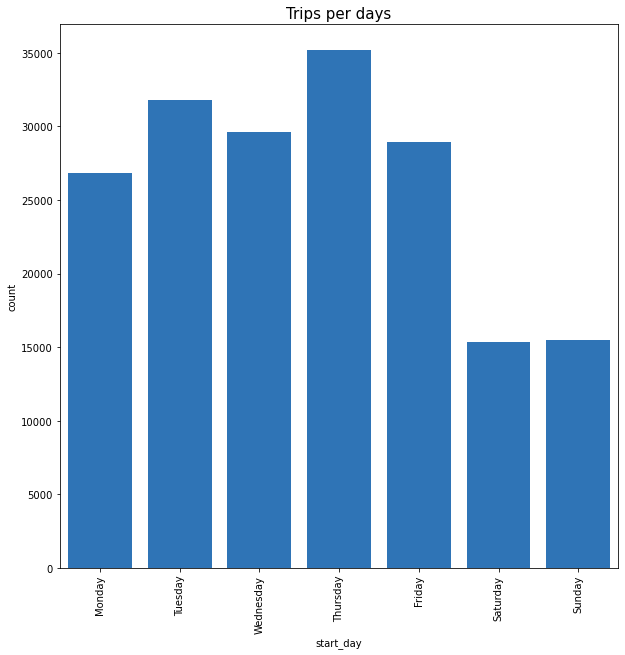

In [11]:
# Show count plot to more understanding using days names to know which specific days has more.
orders = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.title('Trips per days', size= 15)
sb.countplot(data= df_clean, x = 'start_day', color= '#1874CD', order=orders);

What is the average bike trip by Subscriber and Customer?
According to this graph it is clearly that Subscribers have more bike trip than Customers.

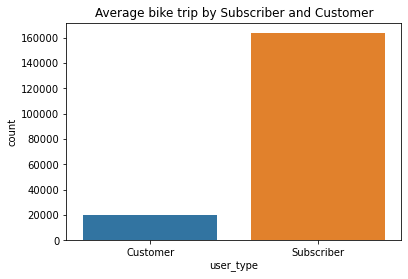

In [12]:
# Show count of subcriber vis customer
sb.countplot(data=df_clean,x='user_type')
plt.title('Average bike trip by Subscriber and Customer');

What is the gender of user has more trip?
As we expected from the pie chart the male has more trip.

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000.]),
 <a list of 8 Text major ticklabel objects>)

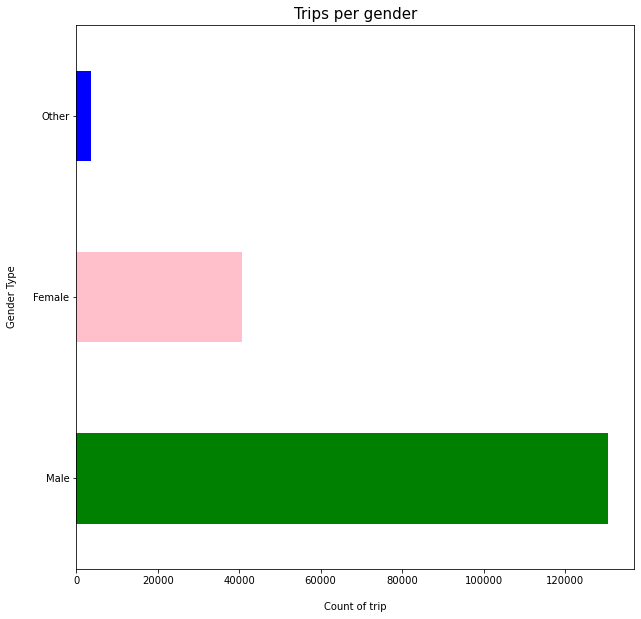

In [13]:
# Show barh chart of users gender

color = ['green', 'pink', 'blue']

df_clean.member_gender.value_counts().plot(kind='barh', color=color, figsize=(10,10), fontsize=10)
plt.title('Trips per gender', size= 15)
plt.ylabel('Gender Type', labelpad=16)
plt.xlabel('Count of trip', labelpad=16)


plt.xticks(rotation=360)

Investigate the relationship between duration bike ride time and user type.

As we can see from the graph above the customer has more duration time than subscriber.

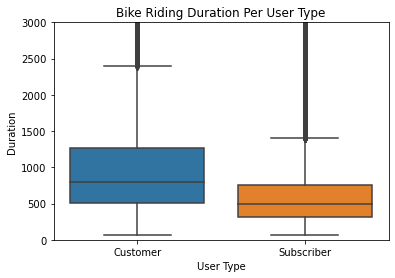

In [14]:
# Show box plot to Investigate the relationship between duration bike ride time and user type.

sb.boxplot(data=df_clean, x='user_type', y='duration_sec')
plt.ylim(0,3000)
plt.title("Bike Riding Duration Per User Type")
plt.xlabel('User Type')
plt.ylabel('Duration')
plt.show()

Do subscribers and customers differ in their usage throughout the days of the week?

As ready to see from the charts over the Sunday and Saturday has the greatest contrast in proportion for customers, Where they have a more indeed proportion with the rest of the weekdays when compared to the subscribers, where their ride rate could be a parcel lower when compared to weekdays. My clarification is that subscribers are commuters who for the most part utilize these bicycles for Monday to Friday for work, and by differentiate, will ride them a part less on Sunday and Saturday. customers are more indeed in their utilization all through the week as they do not utilize them for commuting to work but for recreation.


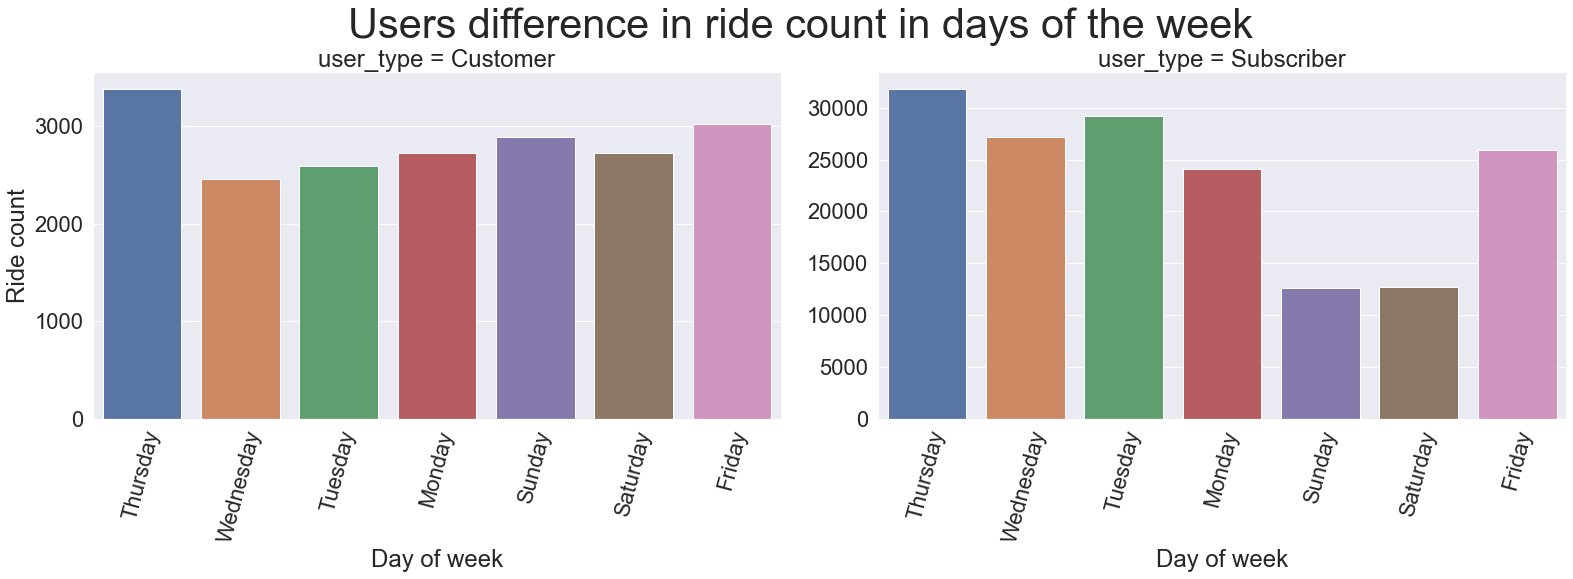

In [15]:
# Use three variables: start_day , count, user_type
sb.set( rc = {'figure.figsize' : ( 30, 20 ), 
               'axes.labelsize' : 12 })
sb.set(font_scale = 2)

mv1 = sb.catplot(data=df_clean, x='start_day', col="user_type", 
                 kind='count', sharey = False, height=7, aspect=11/7)

mv1.set_xticklabels(rotation=75);

mv1.fig.suptitle("Users difference in ride count in days of the week" ,
               fontsize = 'xx-large')
mv1.fig.subplots_adjust( top = 0.85 )

mv1.set_axis_labels( "Day of week" , "Ride count")


plt.show()

What is the average trip duration variation in weekdays between customers and subscribers ?
As we can see from the graph the customer has longest duration trip of subscriber.

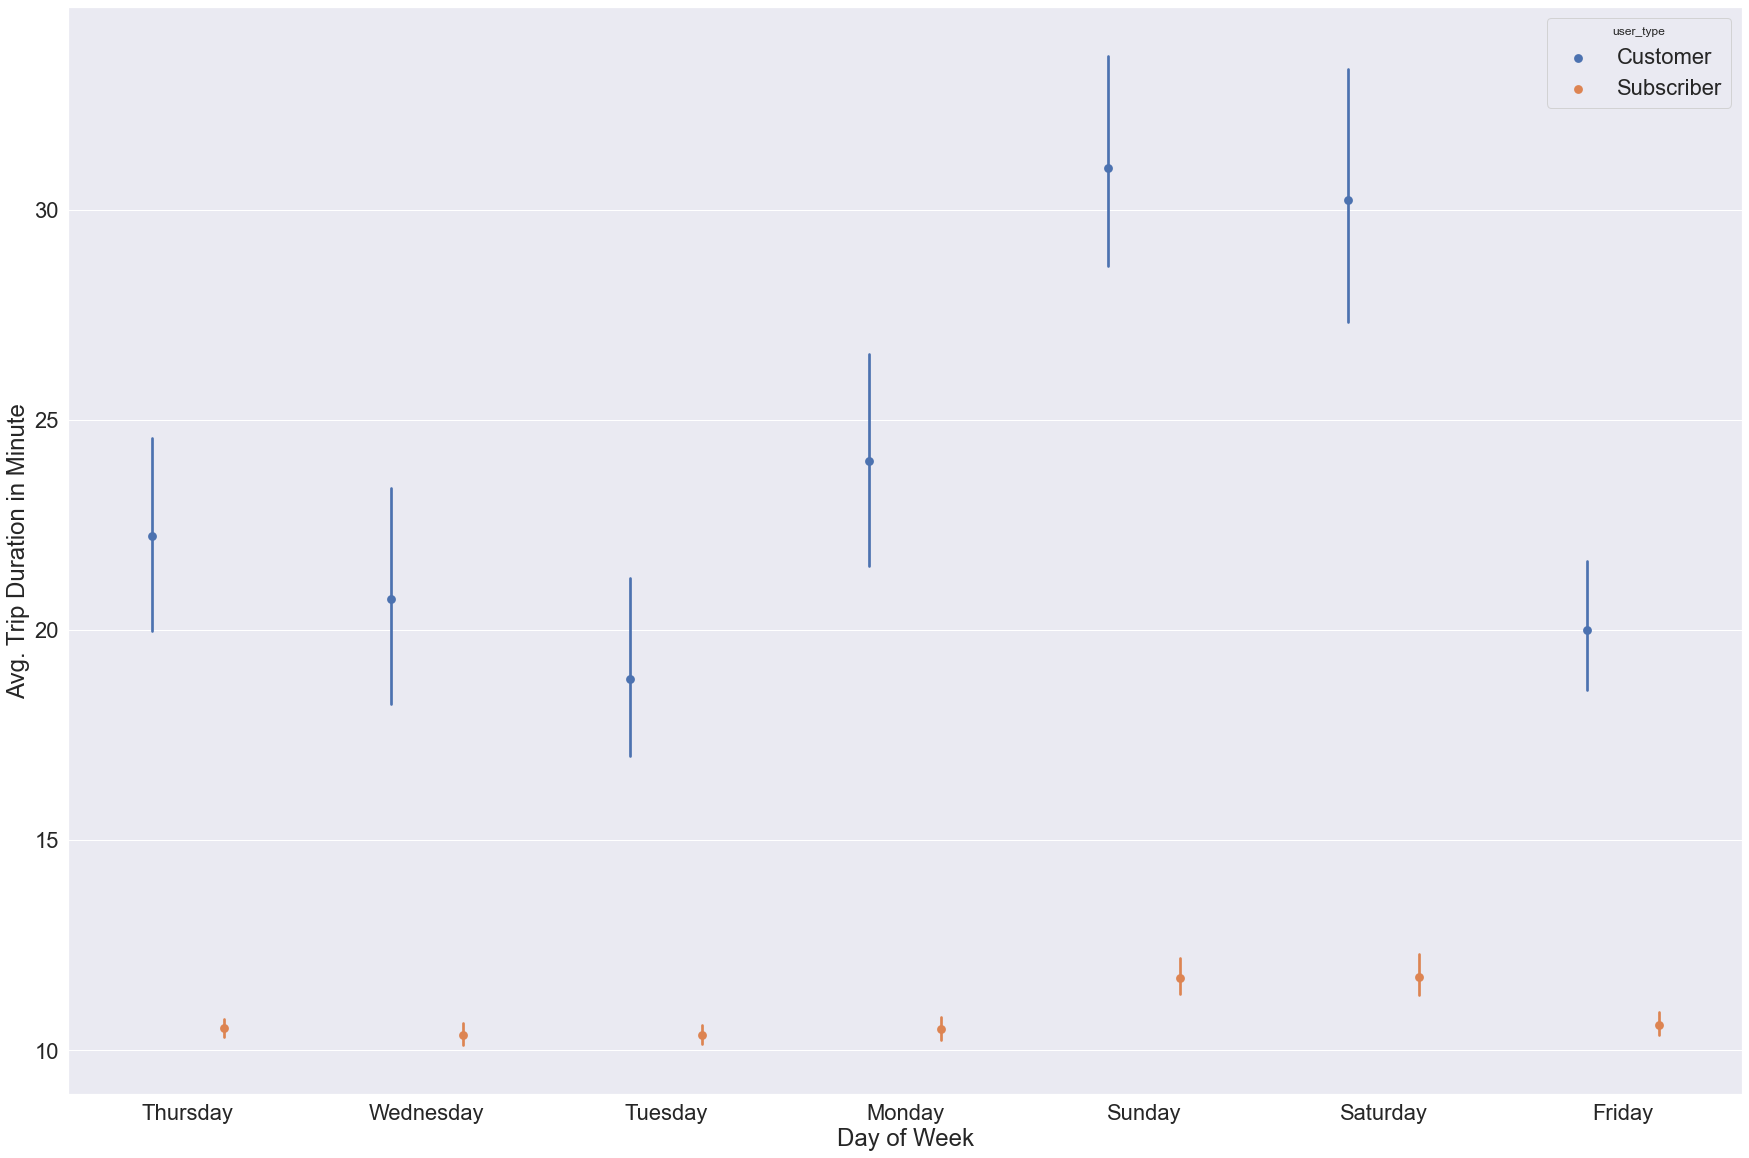

In [16]:
# Use three variables: start_day , duration_min, user_type

sb.pointplot(data=df_clean, x='start_day', y='duration_min', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

## Summary 


There's no enormous astonish watched. Leasing a bikes from the Passage GoBike Framework could be a phenomenal way of moving around within the city, both for satisfaction and work. hese data showes only the month of February of 2019 there are two types of clients using the system: Subscribers and Customers. Subscribers are basically everyday commuters, having brief trips to and from work, who lease bikes on weekdays. Too, the male has more trips than females. Furthermore, the customers of Ford Go Bike they're aged in their '30s, and most of them are male. The duration of the trip at the end of the week Saturday and Sunday have the least that and the clarification is to they require taking rest and unwinding.Customers are more often than not visitors or periodic riders who utilize the framework basically on ends of the week.

### References:
- https://www.kaggle.com/mohamedahmed10000/ford-gobike-system-data-visualization
- https://github.com/az2a/Udacity-Data-Analyst-Nanodegree/blob/main/Ford_go_bike/Ford_go_bikes.ipynb
- https://www.youtube.com/watch?v=JG8GRlMjp3c

In [ ]:
!jupyter nbconvert Slide_deck_temp.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Slide_deck_temp.ipynb to slides
[NbConvertApp] Writing 812630 bytes to Slide_deck_temp.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Slide_deck_temp.slides.html
Use Control-C to stop this server
